In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_csv('versao_3_spotify_songs.csv')

In [3]:
df

<bound method DataFrame.info of       track_popularity  danceability    energy       key  loudness      mode  \
0            -2.113439     -0.088882 -0.530658  1.542203 -0.384957 -1.085341   
1            -0.144756     -0.420931 -0.586757 -0.105724 -0.708254 -1.085341   
2            -2.257489     -0.693948 -0.940176  1.542203 -0.558734  0.921370   
3            -2.449556     -0.612781 -1.691893 -0.105724 -1.337469 -1.085341   
4             1.343761      1.541845 -2.011653 -0.380379 -2.333787  0.921370   
...                ...           ...       ...       ...       ...       ...   
8752          0.143344      0.339091  0.086423 -0.929688  0.211313 -1.085341   
8753         -1.777322      0.796581 -1.832139 -0.655033 -0.938869 -1.085341   
8754          0.863594     -0.686570  0.535209  1.542203  0.074102  0.921370   
8755         -1.153106     -0.428310 -0.250167  0.168930 -0.806365 -1.085341   
8756         -0.720956      1.313100  0.019105  0.443585 -0.236885  0.921370   

      s

### Redução de Dimensionalidade 

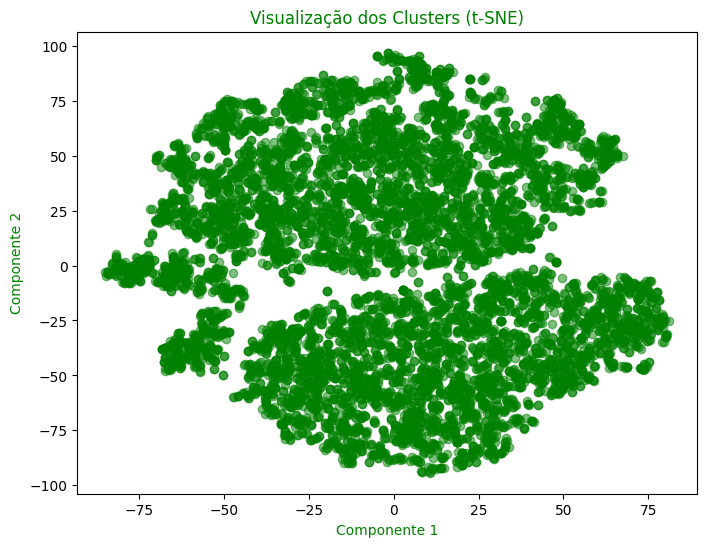

In [4]:

colunas_numericas = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]


dados_numericos = df[colunas_numericas]


tsne = TSNE(n_components=2, random_state=42)
df = tsne.fit_transform(dados_numericos)


plt.figure(figsize=(8, 6))
plt.scatter(df[:, 0], df[:, 1], alpha=0.5, c="green")
plt.title("Visualização dos Clusters (t-SNE)", color="green")
plt.xlabel("Componente 1", color="green")
plt.ylabel("Componente 2", color="green")
plt.show()

### Experimentação com Parâmetros do DBSCAN:

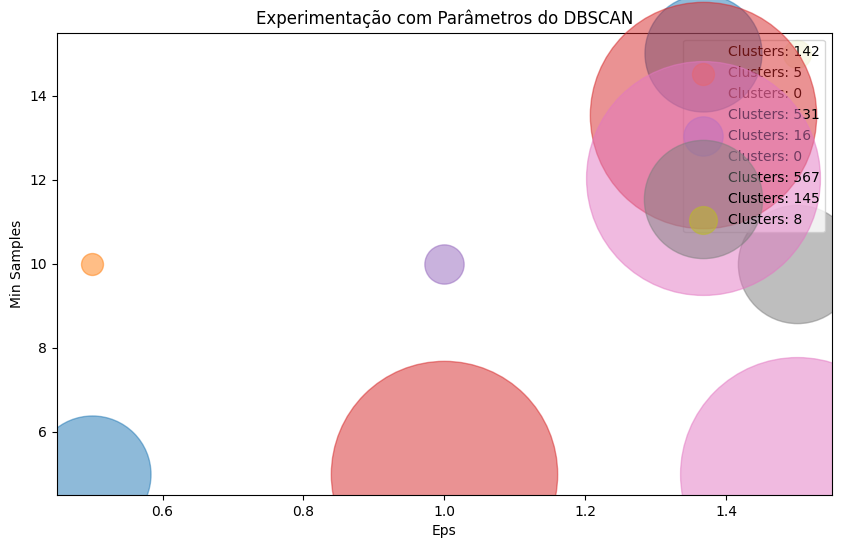

In [6]:

def experimentar_DBSCAN(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Gráfico comparativo
    plt.figure(figsize=(10, 6))
    for (eps, min_samples), clusters in resultados.items():
        plt.scatter(
            eps, min_samples, s=clusters * 50, alpha=0.5, label=f"Clusters: {clusters}"
        )

    plt.title("Experimentação com Parâmetros do DBSCAN")
    plt.xlabel("Eps")
    plt.ylabel("Min Samples")
    plt.legend()
    plt.show()


# Chamada da função de experimentação
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]
experimentar_DBSCAN(eps_values, min_samples_values, df)

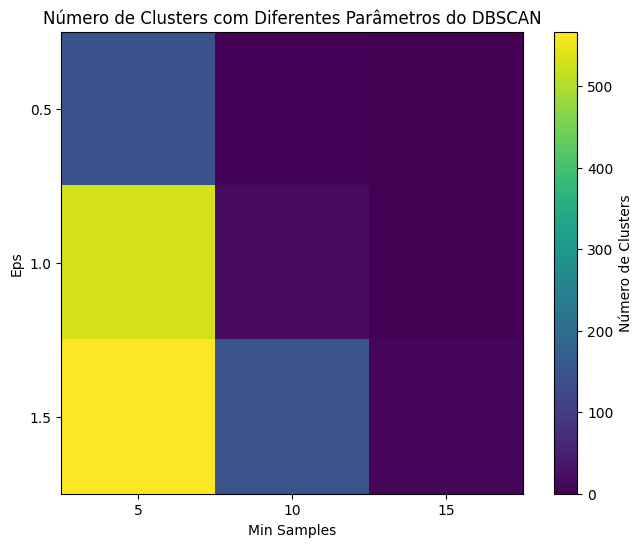

In [8]:
def experimentar_DBSCAN(eps_values, min_samples_values, dados):
    resultados = {}

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dados)
            n_clusters = len(np.unique(labels)) - 1  # Ignora o rótulo -1 (outliers)
            resultados[(eps, min_samples)] = n_clusters

    # Preparação dos dados para o mapa de calor
    n_clusters_array = np.zeros((len(eps_values), len(min_samples_values)))
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            n_clusters_array[i, j] = resultados[(eps, min_samples)]

    # Criação do mapa de calor
    plt.figure(figsize=(8, 6))
    plt.imshow(n_clusters_array, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="Número de Clusters")
    plt.xticks(np.arange(len(min_samples_values)), min_samples_values)
    plt.yticks(np.arange(len(eps_values)), eps_values)
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.title("Número de Clusters com Diferentes Parâmetros do DBSCAN")
    plt.show()


# Chamada da função de experimentação
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]
experimentar_DBSCAN(eps_values, min_samples_values, df)